In [1]:
# coding:utf8
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
lianjia_data = pd.read_csv('task_2_lianjia_data.csv')

In [3]:
lianjia_data.head()

,简介（方式·小区名 户型 朝向）,区,地铁站,村,面积大小（㎡）,朝向,户型,楼层类型,楼层（层）,标签
0,整租·长桥一村 1室0厅 南,徐汇,长桥,长桥一村,39,南,1室0厅1卫,高楼层,6,随时看房
1,整租·馨宁公寓 1室1厅 南,徐汇,华泾,馨宁公寓,42,南,1室1厅1卫,高楼层,29,"精装,随时看房"
2,整租·长桥三村 2室1厅 南,徐汇,长桥,长桥三村,51,南,2室1厅1卫,高楼层,6,随时看房
3,整租·东湾小区 1室1厅 南,徐汇,华泾,东湾小区,47,南,1室1厅1卫,中楼层,6,随时看房
4,整租·花苑村紫竹园 1室1厅 南,徐汇,康健,花苑村紫竹园,42,南,1室1厅1卫,高楼层,6,随时看房


In [4]:
original_data = lianjia_data.groupby("面积大小（㎡）")["面积大小（㎡）"].agg({'房源数量（套）':'count'})
original_data

/Users/jason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,房源数量（套）
面积大小（㎡）,
7,1
9,3
10,1
11,1
12,1
...,...
152,1
155,1
162,1


In [5]:
y_count = original_data.values[:,0]
y_count

array([ 1,  3,  1,  1,  1,  1,  2,  5,  4,  1,  4,  1,  7,  2,  4,  4,  4,
        6,  3,  7, 12, 16, 37, 11, 19, 21, 29, 38, 24, 18, 24, 11,  9, 22,
       20, 15,  8, 16, 15, 10, 17,  9, 14, 10, 17,  8,  9, 10,  6,  3,  4,
        3,  8,  9,  6,  5,  6,  3,  7,  2,  5,  4,  5,  4,  2,  3,  3,  2,
        4,  2,  3,  3,  6,  3,  2,  1,  2,  1,  2,  2,  6,  4,  7,  3,  5,
        2,  3,  9,  4,  2,  4,  3,  2,  2,  1,  4,  4,  2,  3,  1,  2,  2,
        1,  1,  2,  2,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1])

In [6]:
x_area = original_data.index.values
x_area

array([  7,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 103, 104, 105, 106, 108, 109, 110, 111, 113, 116, 118,
       121, 123, 125, 126, 128, 129, 130, 131, 133, 137, 139, 143, 145,
       151, 152, 155, 162, 171, 172])

/Users/jason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


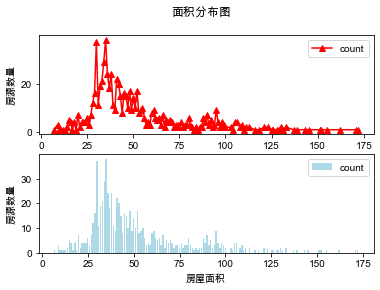

In [7]:
fig = plt.figure(edgecolor='black',frameon=True)
fig.suptitle('面积分布图')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

ax1=fig.add_subplot(2,1,1)      
ax1.plot(x_area,y_count,'r^-',label='count')
ax1.set_xlabel('房屋面积')
ax1.set_ylabel('房源数量')
ax1.legend(loc="upper right")

ax2=fig.add_subplot(2,1,2)
ax2.bar(x_area,y_count,color='lightblue',label='count')
ax2.set_xlabel('房屋面积')
ax2.set_ylabel('房源数量')
ax2.legend(loc="upper right")

fig.show()
plt.show()

In [8]:
district_data = lianjia_data.groupby("区")["面积大小（㎡）"].agg('count')
district_data

区
嘉定      6
奉贤      1
徐汇    126
普陀     22
杨浦     56
松江     45
浦东    106
虹口     24
长宁     86
闵行     86
青浦     10
静安    108
黄浦     76
Name: 面积大小（㎡）, dtype: int64

In [9]:
x_district = district_data.index.values
x_district

array(['嘉定', '奉贤', '徐汇', '普陀', '杨浦', '松江', '浦东', '虹口', '长宁', '闵行', '青浦',
       '静安', '黄浦'], dtype=object)

In [10]:
y_total = district_data.values
y_total

array([  6,   1, 126,  22,  56,  45, 106,  24,  86,  86,  10, 108,  76])

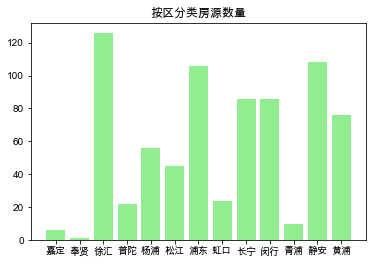

In [11]:
fig,ax = plt.subplots(1,1)
# ax1=ax[0]
ax.bar(x_district,y_total,color='lightgreen')
ax.set_title('按区分类房源数量') 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.show()

In [12]:
floor_data = lianjia_data.groupby('楼层类型')['楼层类型'].agg('count')
floor_data

楼层类型
中楼层                            231
低楼层                            146
地下室                              5
高楼层                            370
Name: 楼层类型, dtype: int64

In [13]:
x_floor = [i.split(' ')[0]  for i in floor_data.index.tolist()]
x_floor

['中楼层', '低楼层', '地下室', '高楼层']

In [14]:
y_total_count = floor_data.tolist()
y_total_count

[231, 146, 5, 370]

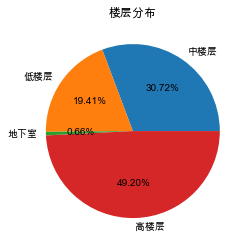

In [15]:
plt.pie(y_total_count,labels = x_floor,autopct='%2.2f%%')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.title('楼层分布')
plt.show()